In [1]:
import re
import tensorflow as tf
import os
import librosa
import numpy as np
import xml.etree.ElementTree as ET
import pandas as pd
import matplotlib.pyplot as plt


from tensorflow import keras
from scipy.signal import hilbert

##Prepare Data

In [ ]:
# Set the path to the full UrbanSound dataset
fulldatasetpath = "I://Synth1PresetTestFiles"

features = []



dirFiles = os.listdir("I://Synth1PresetTestFiles")
dirFiles.sort(key=lambda f: int(re.sub('\D', '', f)))

def getEnvelope(filename):
    audio1, samplerate = librosa.load(fileName, res_type="kaiser_fast", duration=5)
    env1 = np.abs(hilbert(audio1) )
    return env1
env = []
audio = []
value = 0
for file in dirFiles:
#    if value == 1:
#        break
    if "xml" in file:
        sampleNumber = int(file.split(".")[0][4:])
        tempName = file.split(".")[0] + ".wav"
        fileName = os.path.join(os.path.abspath(fulldatasetpath), tempName)
        tree = ET.parse(os.path.join(os.path.abspath(fulldatasetpath), file))
        root = tree.getroot()
        classlabels = []
        for x in range(99):
            classlabels.append(int(root[x + 2].attrib["presetValue"]))
#        classLabel = int(root[value + 2].attrib["presetValue"])
        data = getEnvelope(fileName)[::100]
        env = data

        features.append([data, classlabels])
        value = value + 1
#       print("Appended " + fileName + " Class = " + str(classlabels) + " SampleNumber = " + str(sampleNumber))

del dirFiles
print("All Data Appended")

featuresdf = pd.DataFrame(features, columns=['feature', 'class_label'])
del features
# Convert features and corresponding classification labels into numpy arrays
featureArray = np.array(featuresdf.feature.tolist())
valueArray = np.array(featuresdf.class_label.tolist())

del featuresdf

# split the dataset
from sklearn.model_selection import train_test_split
del tree, root


In [ ]:
featureArray.dump("I://EnvelopeDiv100.dat")

In [6]:
# Set the path to the full UrbanSound dataset
fulldatasetpath = "I://Synth1PresetTestFiles"

features = []



dirFiles = os.listdir("I://Synth1PresetTestFiles")
dirFiles.sort(key=lambda f: int(re.sub('\D', '', f)))

def getEnvelope(filename):
    audio1, samplerate = librosa.load(fileName, res_type="kaiser_fast", duration=5)
    env1 = np.abs(hilbert(audio1) )
    return env1, audio1
env = []
audio = []
value = 0
for file in dirFiles:
    if value == 1:
        break
    if "xml" in file:
        sampleNumber = int(file.split(".")[0][4:])
        tempName = file.split(".")[0] + ".wav"
        fileName = os.path.join(os.path.abspath(fulldatasetpath), tempName)
        tree = ET.parse(os.path.join(os.path.abspath(fulldatasetpath), file))
        root = tree.getroot()
        classlabels = []
        for x in range(99):
            classlabels.append(int(root[x + 2].attrib["presetValue"]))
#        classLabel = int(root[value + 2].attrib["presetValue"])
        data, audio = getEnvelope(fileName)
        env = data

        features.append([data, classlabels])
        value = value + 1
#       print("Appended " + fileName + " Class = " + str(classlabels) + " SampleNumber = " + str(sampleNumber))

del dirFiles
print("All Data Appended")

featuresdf = pd.DataFrame(features, columns=['feature', 'class_label'])
del features
# Convert features and corresponding classification labels into numpy arrays
featureArray = np.array(featuresdf.feature.tolist())
valueArray = np.array(featuresdf.class_label.tolist())

del featuresdf

# split the dataset
from sklearn.model_selection import train_test_split
del tree, root


All Data Appended


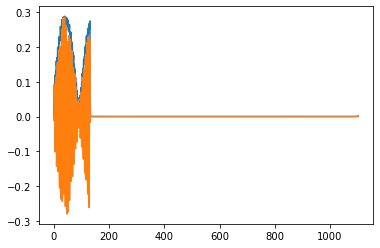

In [17]:
env10 = env[::100]
audio10 = audio[::100]
numb = len(audio)
time = np.linspace(0, len(audio) / 22050, num=len(audio))
plt.plot(env10, label='signal')
plt.plot(audio10, label='envelope')
plt.show()
